In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

<Axes: ylabel='count'>

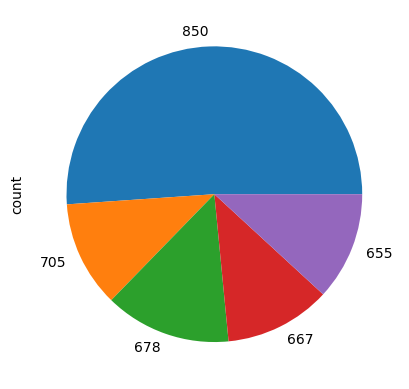

In [7]:
df['CreditScore'].value_counts().head(5).sort_index(ascending=False).plot(kind='pie')

<Axes: xlabel='CreditScore', ylabel='Count'>

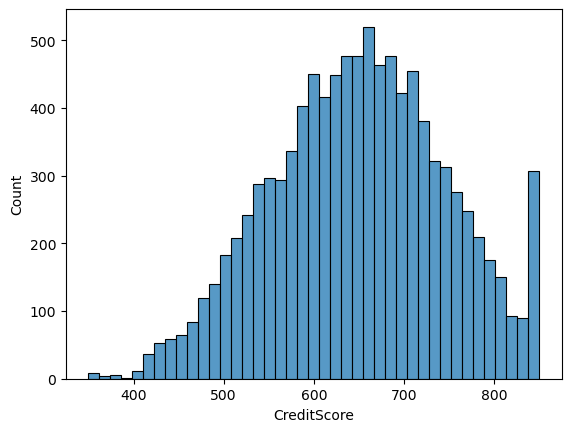

In [8]:
sns.histplot(df['CreditScore'])

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Geography'>

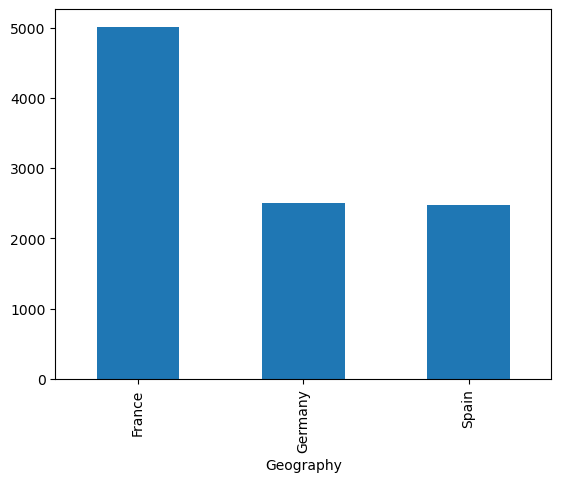

In [10]:
df['Geography'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

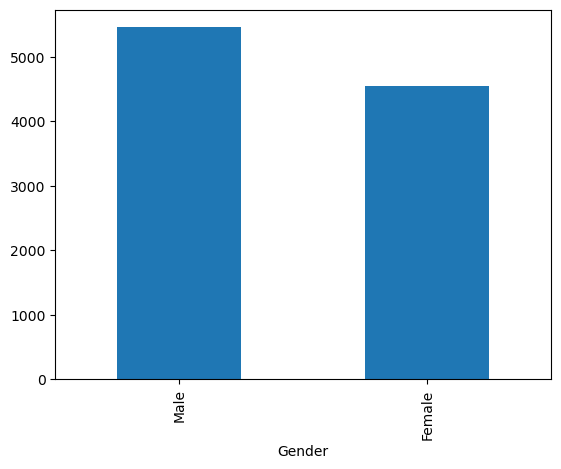

In [11]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='Age'>

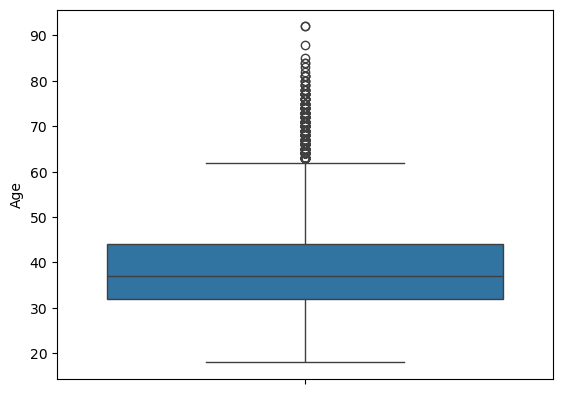

In [12]:
sns.boxplot(df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

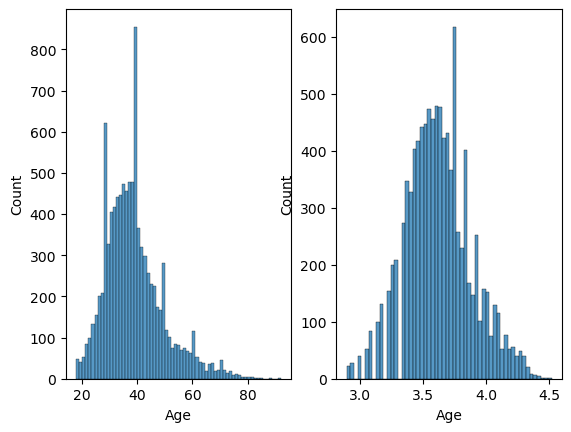

In [13]:
plt.subplot(1,2,1)
sns.histplot(df['Age'])
plt.subplot(1,2,2)
sns.histplot(np.log(df['Age']))

<Axes: ylabel='Age'>

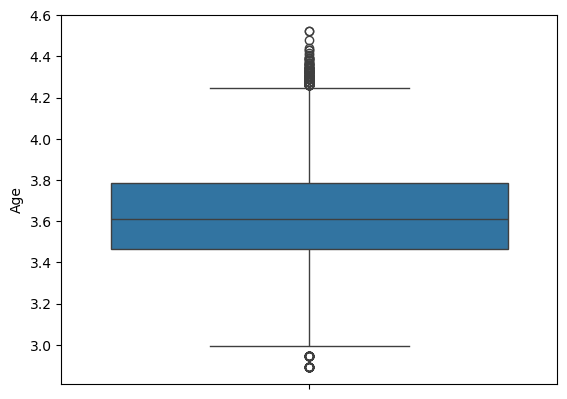

In [14]:
sns.boxplot(np.log(df['Age']))

In [15]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: ylabel='Tenure'>

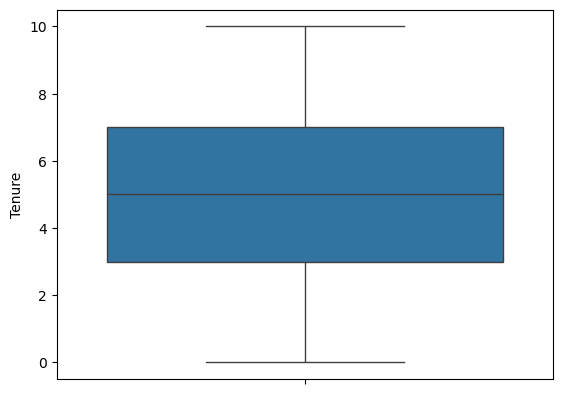

In [16]:
sns.boxplot(df['Tenure'])

<Axes: ylabel='Balance'>

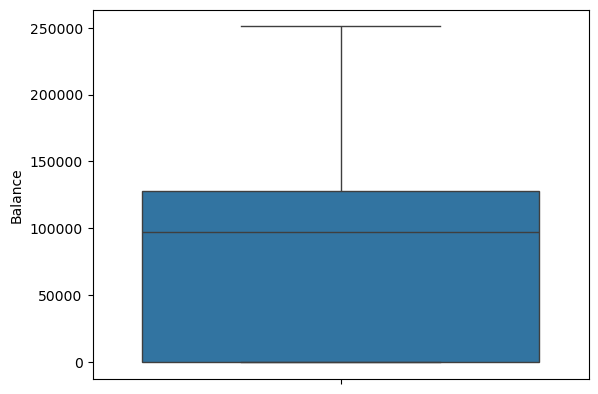

In [17]:
sns.boxplot(df['Balance'])

<Axes: xlabel='Balance', ylabel='Count'>

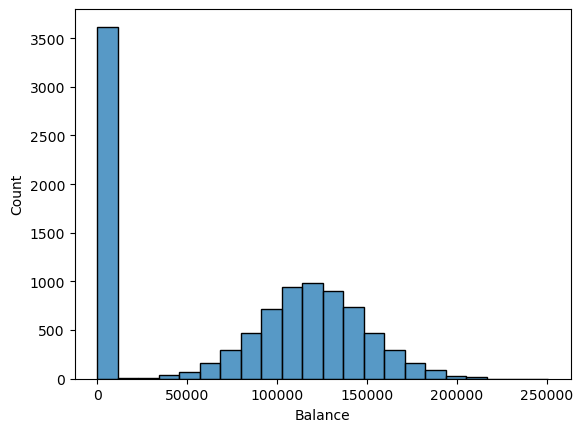

In [18]:
sns.histplot(df['Balance'])

In [19]:
df_balance_0=pd.DataFrame(df[df['Balance']==0]['Exited'])

In [20]:
df_balance_0.value_counts()

Exited
0         3117
1          500
Name: count, dtype: int64

In [21]:
df.groupby('Exited')['Balance'].mean()


Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [22]:
df.groupby('Exited')['Balance'].median()

Exited
0     92072.68
1    109349.29
Name: Balance, dtype: float64

There is a noticeable difference in the average balance between churned and non-churned customers, but the distributions overlap significantly.
This means balance may contribute to churn but it is not a strong standalone predictor.

<Axes: ylabel='count'>

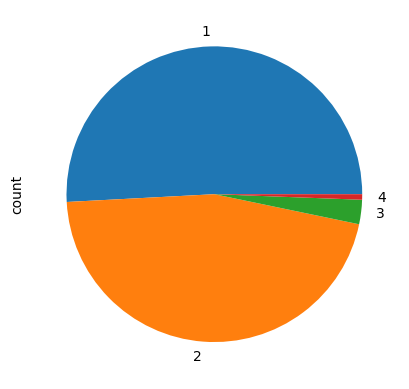

In [23]:
df['NumOfProducts'].value_counts().plot(kind='pie')

<Axes: ylabel='NumOfProducts'>

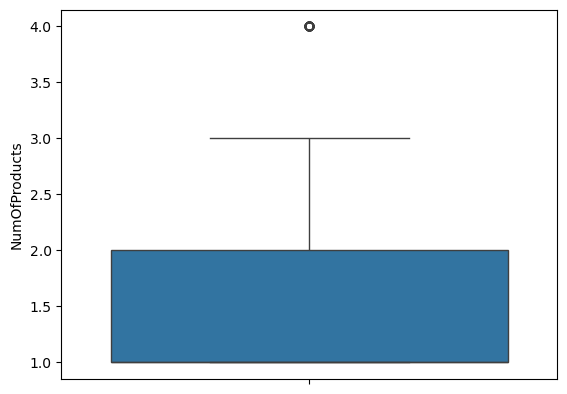

In [24]:
sns.boxplot(df['NumOfProducts'])

<Axes: ylabel='Frequency'>

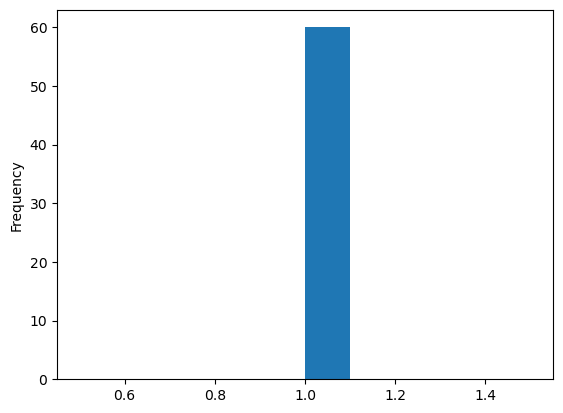

In [25]:
df[df['NumOfProducts']==4]['Exited'].plot(kind='hist')

<Axes: ylabel='Frequency'>

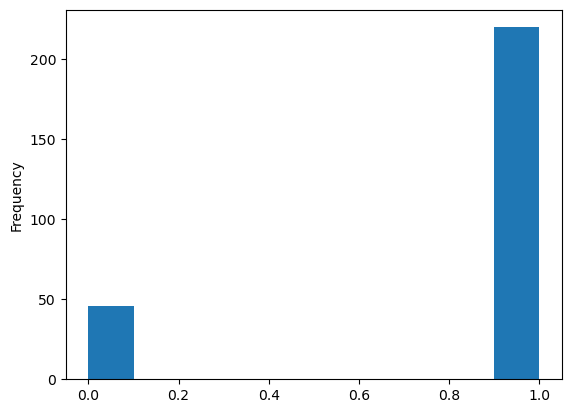

In [26]:
df[df['NumOfProducts']==3]['Exited'].plot(kind='hist')

<Axes: ylabel='Frequency'>

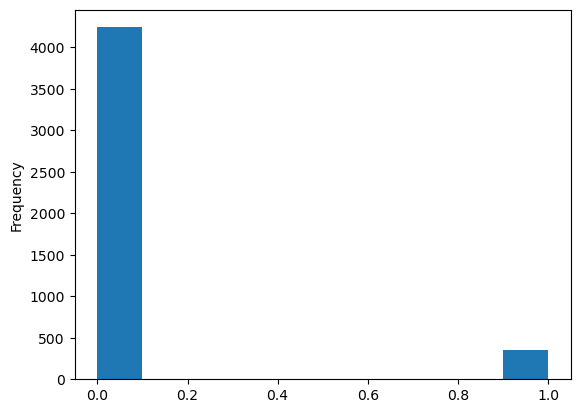

In [27]:
df[df['NumOfProducts']==2]['Exited'].plot(kind='hist')

Customers with exactly 4 products show extremely high churn. Customers with 2 or 3 products show very low churn. This suggests that over-selling products may cause dissatisfaction, making customers with more than 3 products more likely to leave the bank.


In [28]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

<Axes: xlabel='HasCrCard'>

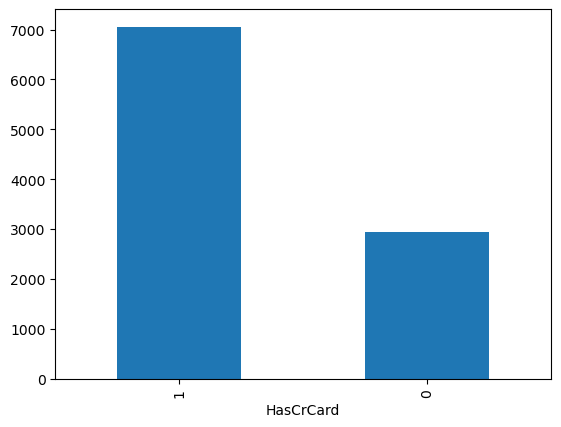

In [29]:
df['HasCrCard'].value_counts().plot(kind='bar')

In [30]:
df['IsActiveMember'].unique()

array([1, 0])

<Axes: xlabel='IsActiveMember'>

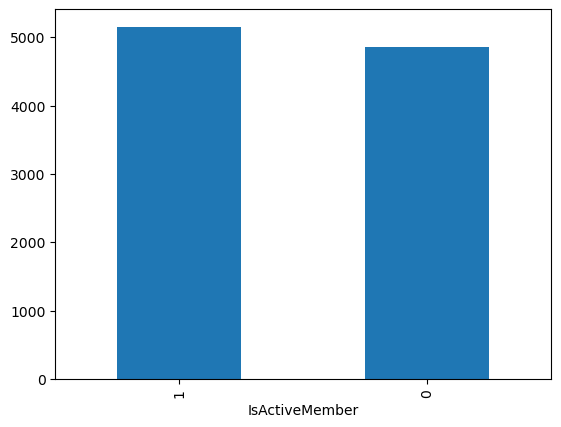

In [31]:
df['IsActiveMember'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

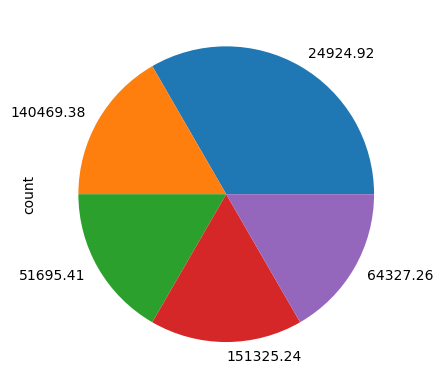

In [32]:
df['EstimatedSalary'].value_counts().head(5).plot(kind='pie')

C:\Users\Bibek\AppData\Local\Temp\ipykernel_20108\2218174724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

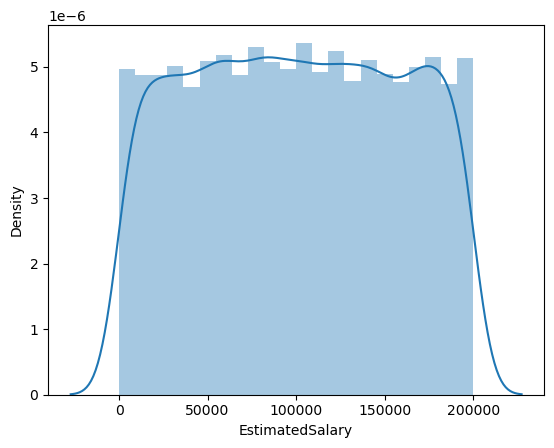

In [33]:
sns.distplot(df['EstimatedSalary'])

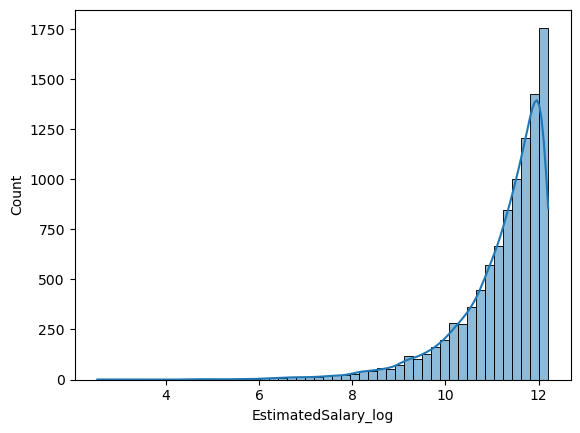

In [34]:
import numpy as np
df['EstimatedSalary_log'] = np.log1p(df['EstimatedSalary'])
sns.histplot(df['EstimatedSalary_log'], bins=50, kde=True)
plt.show()


<Axes: ylabel='EstimatedSalary'>

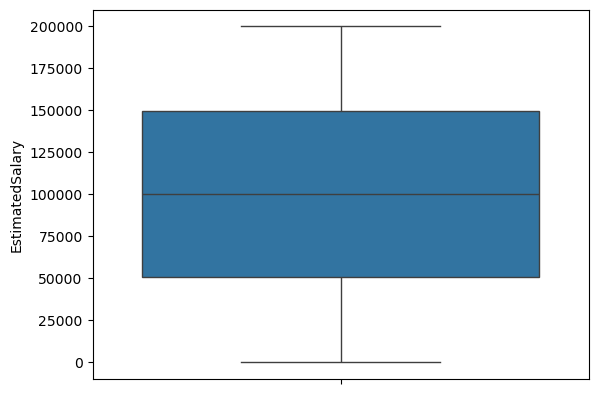

In [35]:
sns.boxplot(df['EstimatedSalary'])

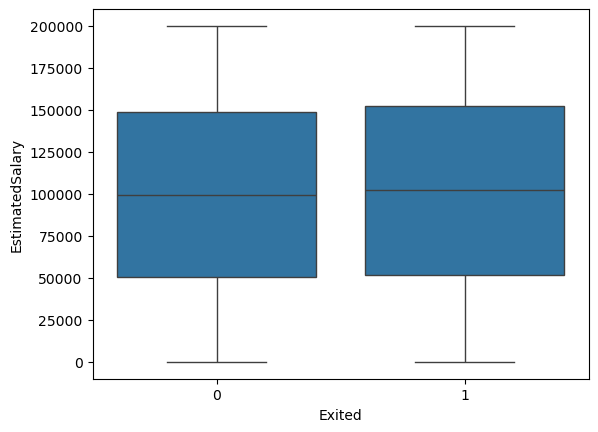

In [36]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.show()


<Axes: xlabel='Exited'>

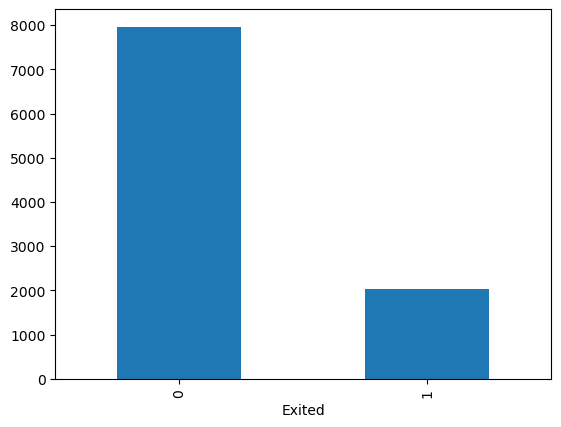

In [37]:
df['Exited'].value_counts().plot(kind='bar')

In [38]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [39]:
##Imbalance dataset


In [40]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalary_log
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,11.526334
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,11.631096
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.643362
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,11.449215
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,11.278280


In [60]:
df_group = df.groupby(['NumOfProducts','Gender'])['Exited'].agg('median')


In [61]:
df_group

NumOfProducts  Gender
1              Female    0.0
               Male      0.0
2              Female    0.0
               Male      0.0
3              Female    1.0
               Male      1.0
4              Female    1.0
               Male      1.0
Name: Exited, dtype: float64

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

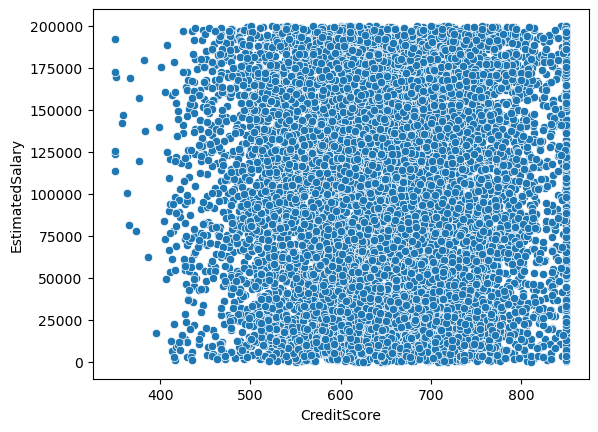

In [65]:
sns.scatterplot(x=df['CreditScore'],y=df['EstimatedSalary'])

In [67]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalary_log
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,11.526334
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,11.631096
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.643362
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,11.449215
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,11.278280


In [68]:
num_data=df.select_dtypes(exclude='object')

In [69]:
num_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalary_log
0,619,42,2,0.00,1,1,1,101348.88,1,11.526334
1,608,41,1,83807.86,1,0,1,112542.58,0,11.631096
2,502,42,8,159660.80,3,1,0,113931.57,1,11.643362
3,699,39,1,0.00,2,0,0,93826.63,0,11.449215
4,850,43,2,125510.82,1,1,1,79084.10,0,11.278280
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,11.474929
9996,516,35,10,57369.61,1,1,1,101699.77,0,11.529790
9997,709,36,7,0.00,1,0,1,42085.58,1,10.647484
9998,772,42,3,75075.31,2,1,0,92888.52,1,11.439166


<Axes: >

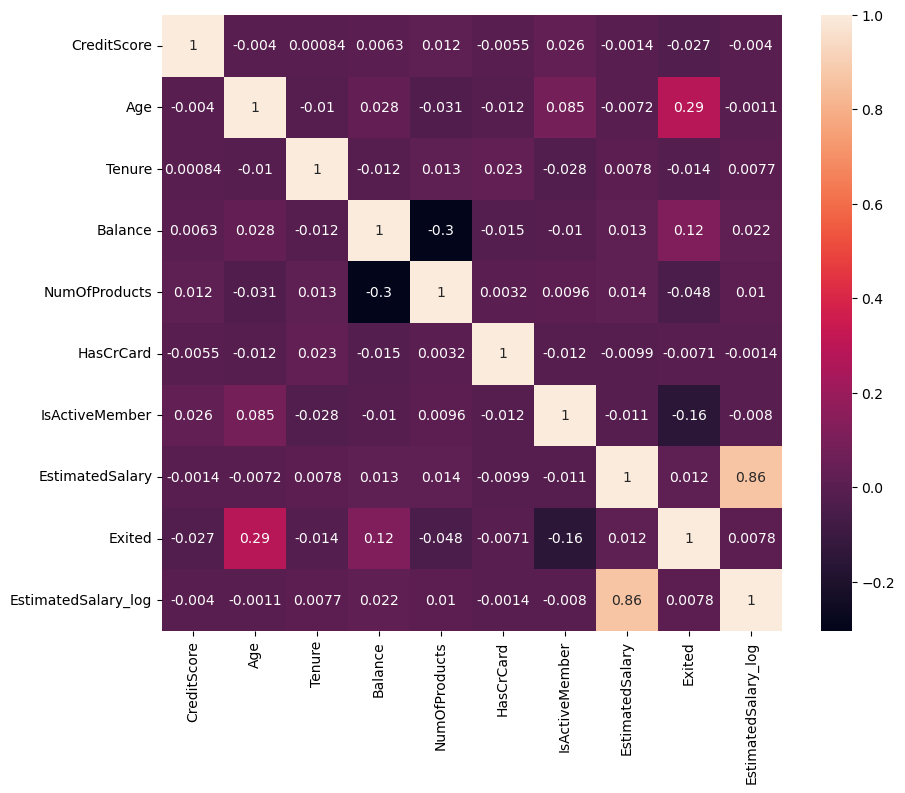

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(num_data.corr(),annot=True)

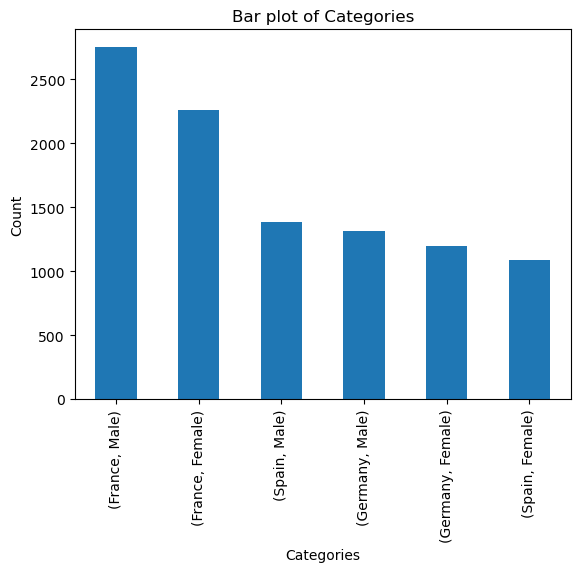

In [90]:
# If cat_data is a Series (single categorical column)
cat_data.value_counts().plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar plot of Categories')
plt.show()

In [91]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalary_log
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,11.526334
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,11.631096
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.643362
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,11.449215
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,11.278280


<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

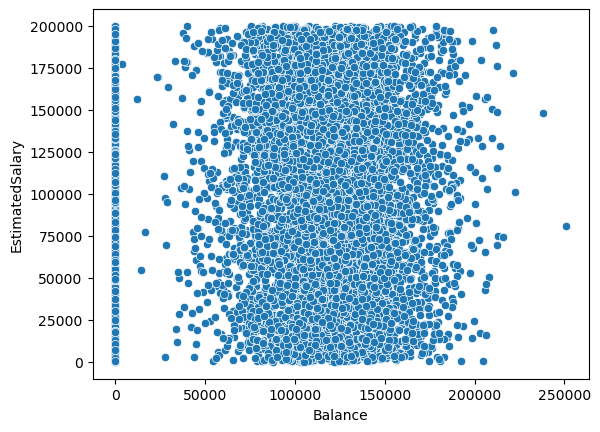

In [93]:
sns.scatterplot(x=df['Balance'],y=df['EstimatedSalary'])

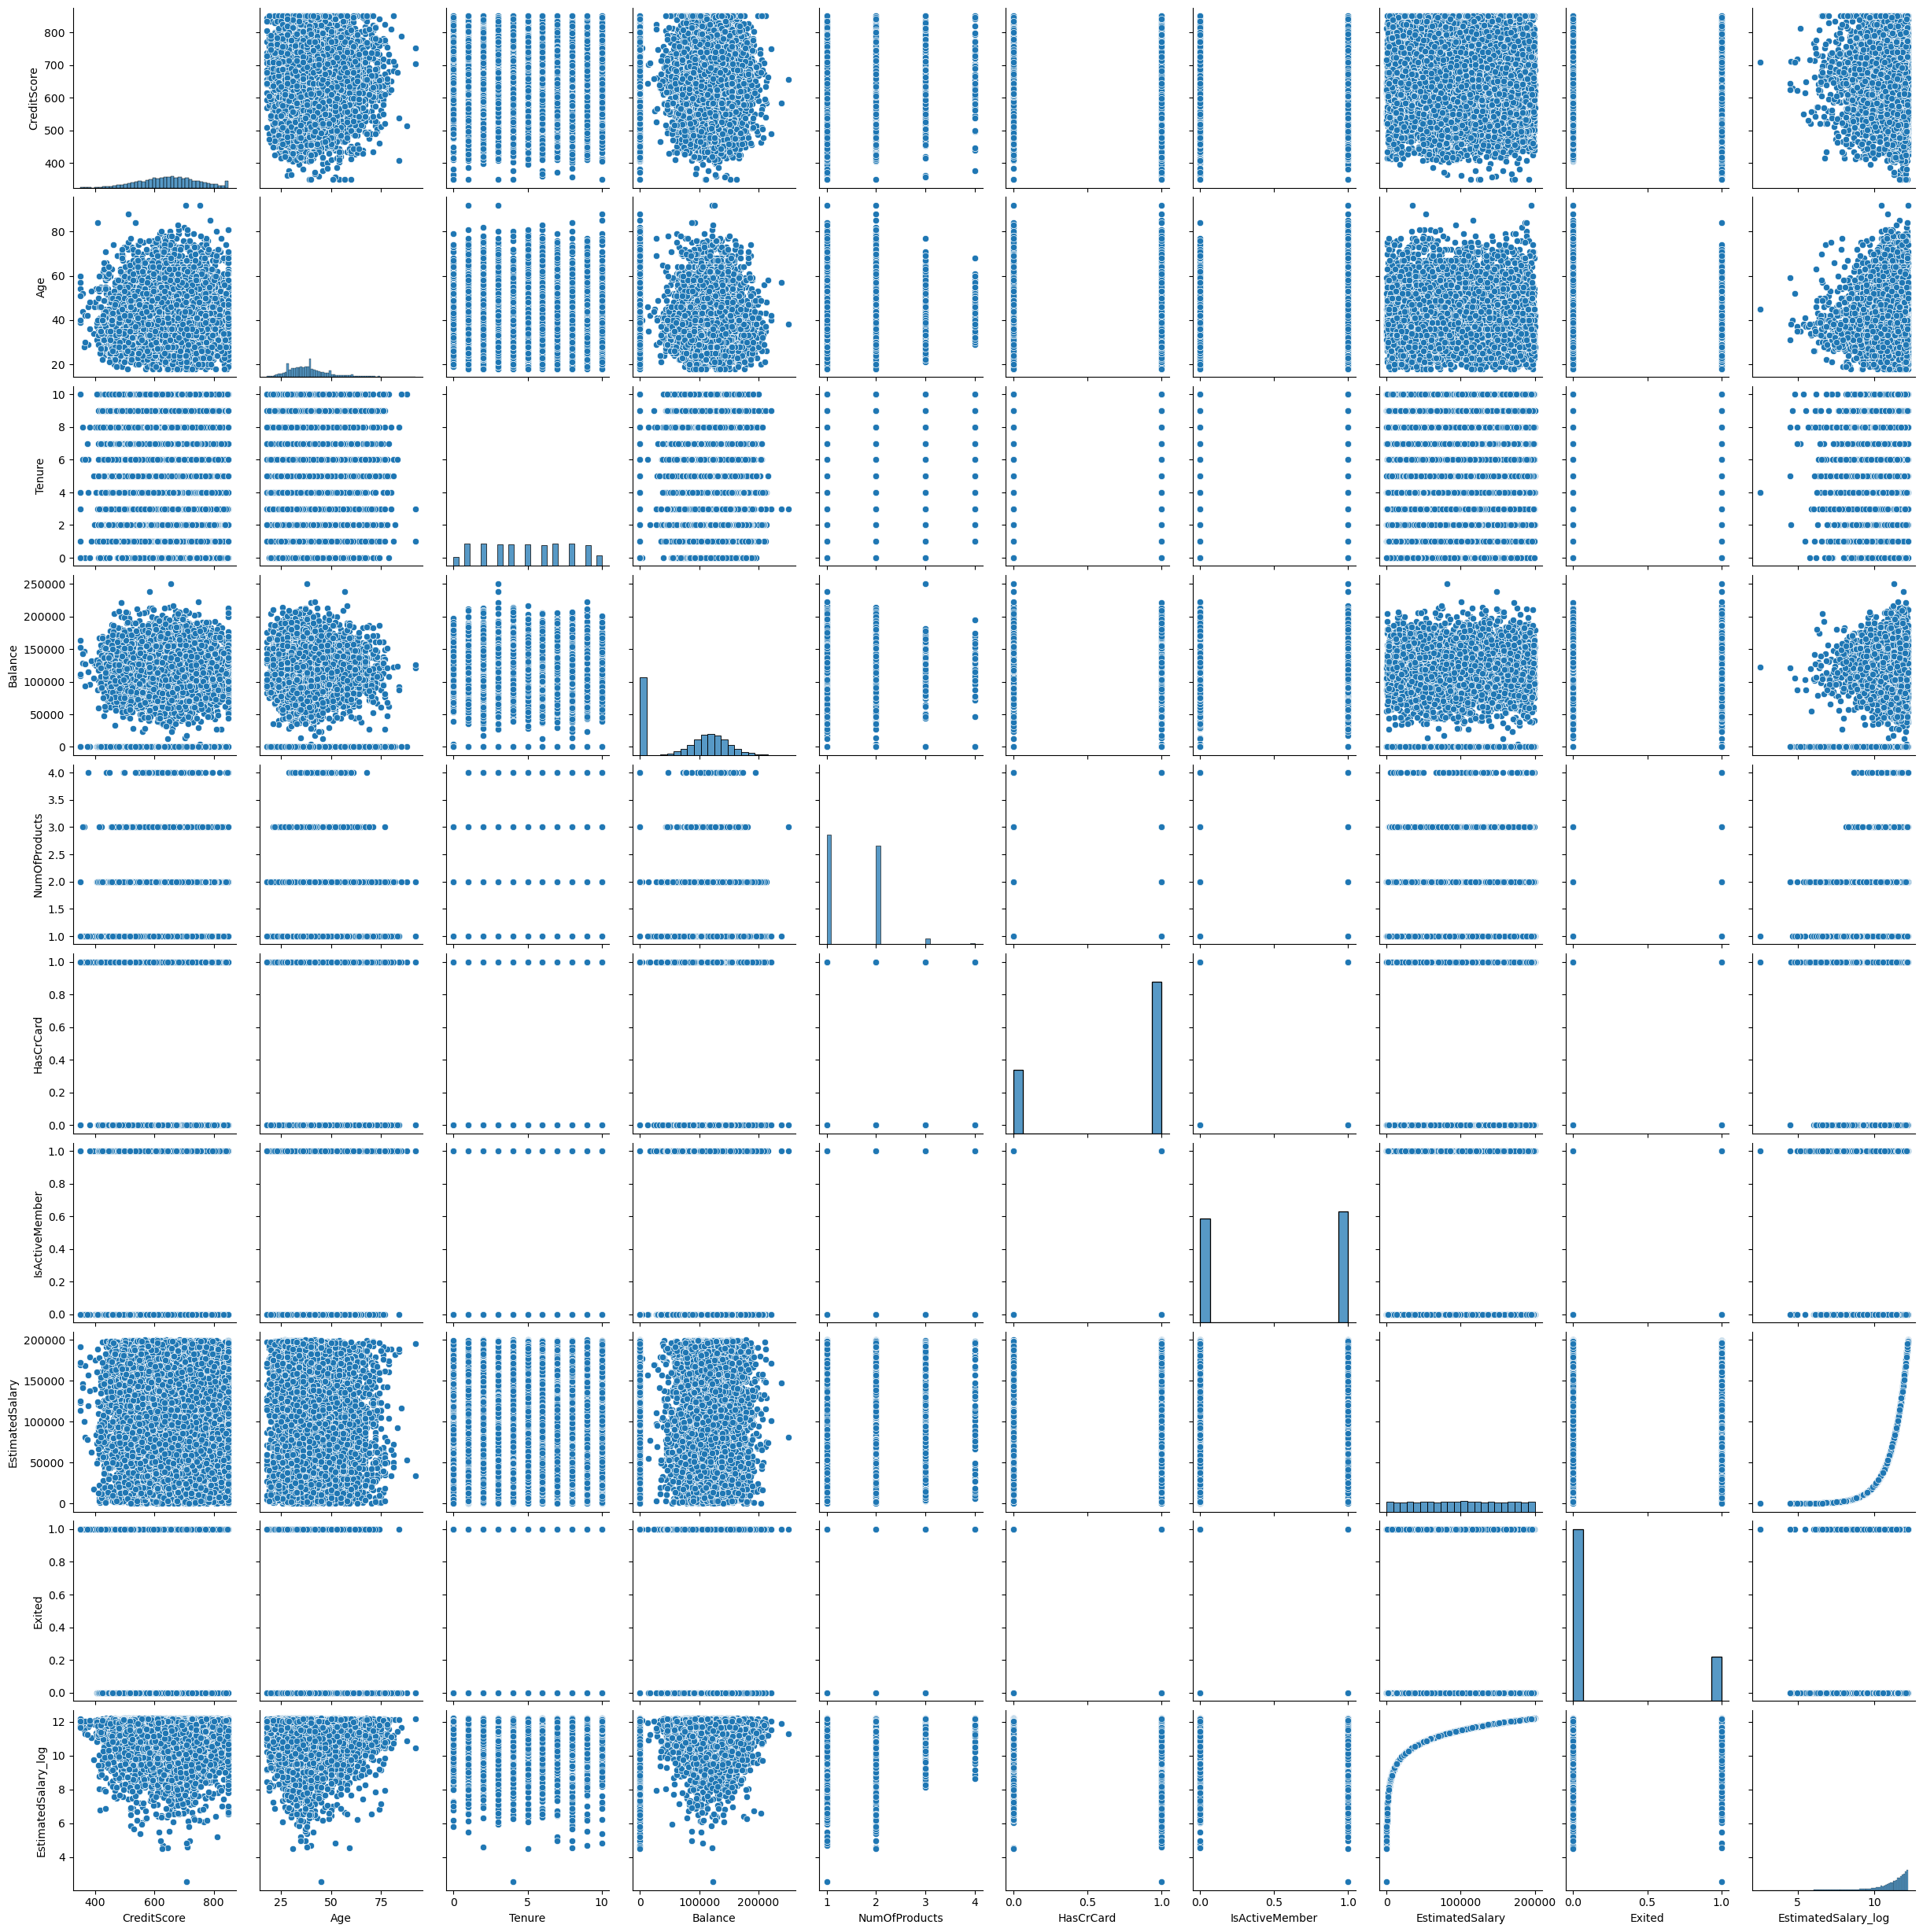

In [95]:
sns.pairplot(df)

<Axes: ylabel='CreditScore'>

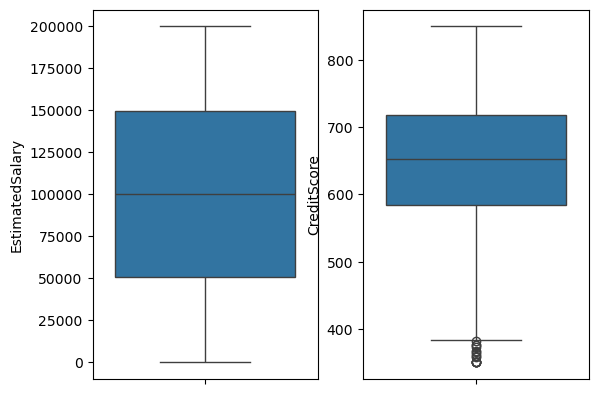

In [100]:
plt.subplot(1,2,1)
sns.boxplot(df['EstimatedSalary'])
plt.subplot(1,2,2)
sns.boxplot(df['CreditScore'])

In [148]:
df_less=df[df['CreditScore']<=450]

In [151]:
df_less=pd.DataFrame(df_less)

In [155]:
df_less.shape

(189, 12)

In [156]:
df_less.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalary_log
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,425.058201,40.634921,4.925926,72192.032857,1.502646,0.740741,0.449735,100812.151905,0.322751,11.226644
std,23.131488,10.796919,2.898058,62522.429649,0.624196,0.439392,0.498788,55614.146503,0.468770,0.993540
min,350.000000,21.000000,0.000000,0.000000,1.000000,0.000000,0.000000,878.870000,0.000000,6.779774
25%,418.000000,33.000000,2.000000,0.000000,1.000000,0.000000,0.000000,57098.000000,0.000000,10.952542
50%,431.000000,38.000000,5.000000,91893.320000,1.000000,1.000000,0.000000,96615.230000,0.000000,11.478502
75%,442.000000,46.000000,7.000000,127197.140000,2.000000,1.000000,1.000000,149471.130000,1.000000,11.914865
max,450.000000,84.000000,10.000000,177619.710000,4.000000,1.000000,1.000000,198874.520000,1.000000,12.200434


In [157]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalary_log
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,11.208386
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,1.000216
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,2.532108
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,10.839642
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,11.514873
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,11.914311
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,12.206040


In [ ]:
#I did not find any odd data that make it bias toward it 


In [160]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedSalary_log
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,11.526334
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,11.631096
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.643362
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,11.449215
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,11.278280


<Axes: xlabel='Tenure', ylabel='Exited'>

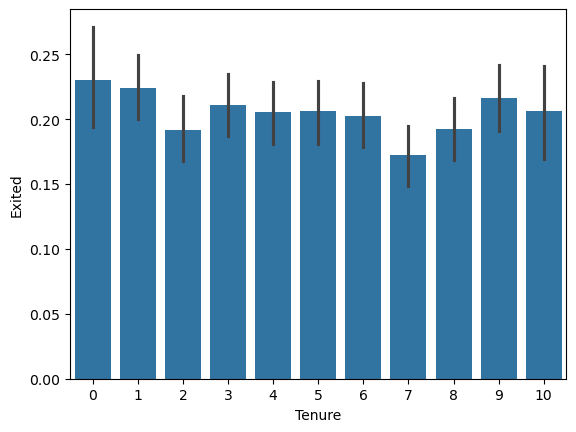

In [164]:
sns.barplot(x=df['Tenure'],y=df['Exited'])

<Axes: xlabel='NumOfProducts', ylabel='Exited'>

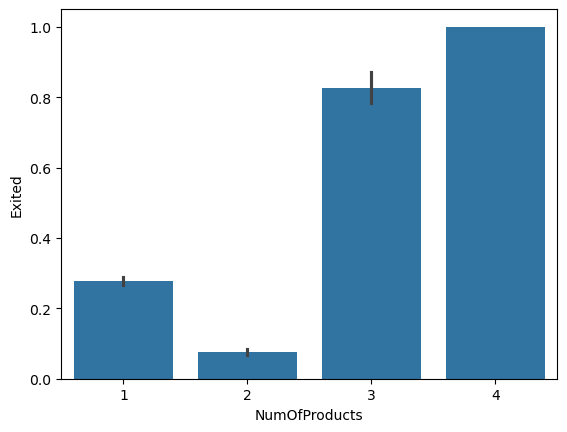

In [167]:
sns.barplot(x=df['NumOfProducts'],y=df['Exited'])

<Axes: xlabel='HasCrCard', ylabel='EstimatedSalary'>

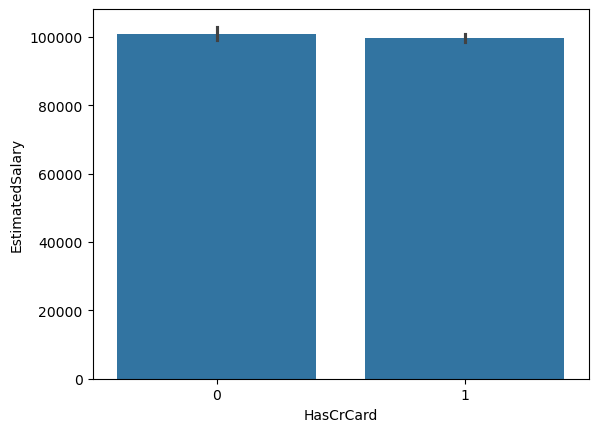

In [168]:
sns.barplot(x=df['HasCrCard'],y=df['EstimatedSalary'])

<Axes: xlabel='HasCrCard', ylabel='Exited'>

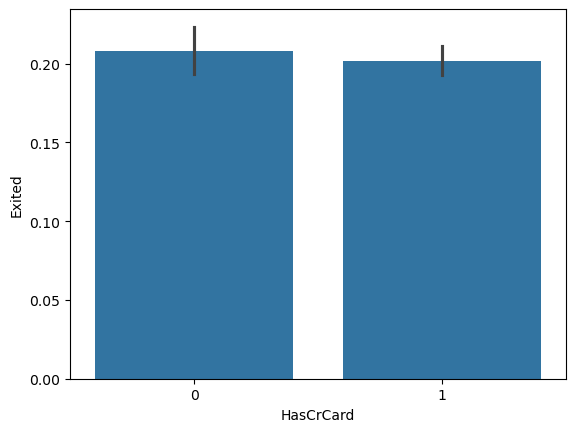

In [169]:
sns.barplot(x=df['HasCrCard'],y=df['Exited'])

<Axes: xlabel='IsActiveMember', ylabel='Exited'>

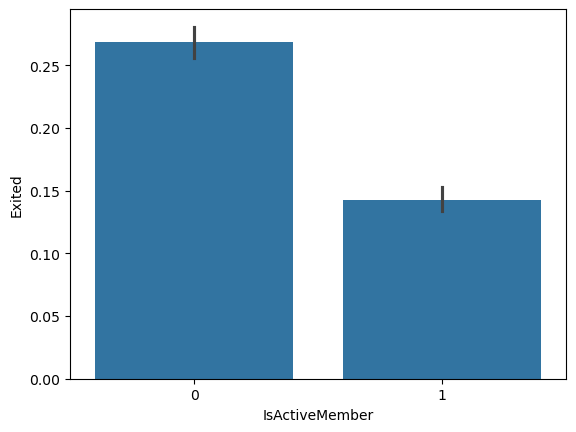

In [171]:
sns.barplot(x=df['IsActiveMember'],y=df['Exited'])